In [1]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"
dados = pd.read_csv(uri)
dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [2]:
a_renomear = {
    'expected_hours' : 'horas_esperadas',
    'price' : 'preco',
    'unfinished' : 'nao_finalizado'
}

dados = dados.rename(columns= a_renomear)
dados.head()

,nao_finalizado,horas_esperadas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [3]:
trocar = {
    0 : 1,
    1 : 0
}
dados['finalizado'] = dados.nao_finalizado.map(trocar)
dados.head()

,nao_finalizado,horas_esperadas,preco,finalizado
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


In [4]:
dados.tail()

,nao_finalizado,horas_esperadas,preco,finalizado
2152,0,80,7518,1
2153,1,52,1332,0
2154,0,40,473,1
2155,0,75,5324,1
2156,1,37,377,0


<AxesSubplot:xlabel='horas_esperadas', ylabel='preco'>

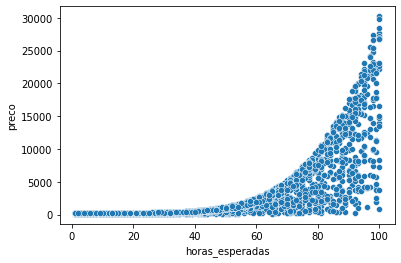

In [5]:
import seaborn as sns

sns.scatterplot(x='horas_esperadas', y='preco', data=dados)

<AxesSubplot:xlabel='horas_esperadas', ylabel='preco'>

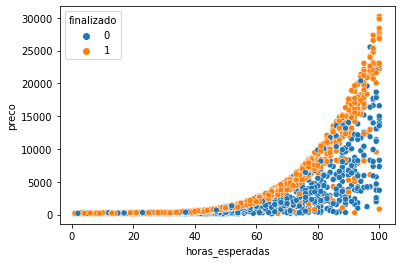

In [6]:
sns.scatterplot(x='horas_esperadas', y='preco', hue='finalizado', data=dados)

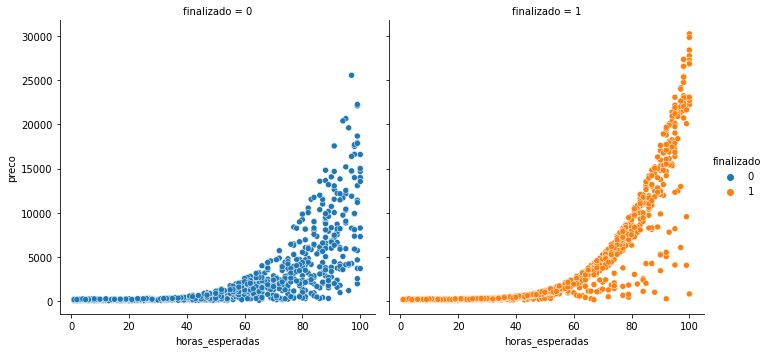

In [7]:
sns.relplot(x='horas_esperadas', y='preco', hue='finalizado', col='finalizado', data=dados)

In [8]:
x = dados[['horas_esperadas', 'preco']]
y = dados['finalizado']

In [9]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

SEED = 20

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,
                                                        random_state = SEED, test_size = 0.25,
                                                        stratify = y)
print(treino_x.shape)
print(teste_x.shape)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = LinearSVC()
modelo.fit(treino_x, treino_y.values.ravel()) # com treino_y da um aviso, estudar "numpy.ravel" (https://numpy.org/doc/stable/reference/generated/numpy.ravel.html#numpy.ravel)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100 # taxa de acerto
print("A acurácia foi %.2f%%" % acuracia)

(1617, 2)
(540, 2)
Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 59.63%


/home/marco/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [10]:
import numpy as np
previsoes_de_base = np.ones(540)
acuracia = accuracy_score(teste_y, previsoes_de_base) * 100 # taxa de acerto
print("A acurácia do algoritmo de baseline foi %.2f%%" % acuracia)

A acurácia do algoritmo de baseline foi 52.59%


<AxesSubplot:xlabel='horas_esperadas', ylabel='preco'>

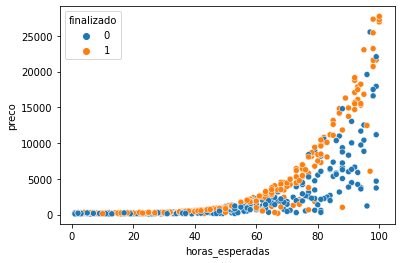

In [11]:
sns.scatterplot(x='horas_esperadas', y='preco', hue=teste_y, data=teste_x)

In [12]:
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()
print(x_min, x_max, y_min, y_max)

1 100 101 27738


In [13]:
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

In [14]:
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos

array([[1.000000e+00, 1.010000e+02],
       [1.990000e+00, 1.010000e+02],
       [2.980000e+00, 1.010000e+02],
       ...,
       [9.703000e+01, 2.746163e+04],
       [9.802000e+01, 2.746163e+04],
       [9.901000e+01, 2.746163e+04]])

In [15]:
Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)
Z

/home/marco/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

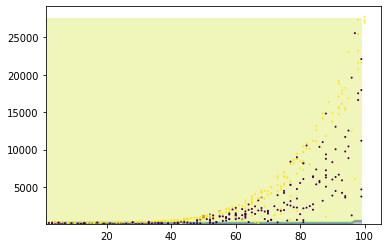

In [16]:
import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha = 0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c = teste_y, s = 1)

#Decision Boundary

In [20]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

SEED = 5
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                        stratify = y)
print(treino_x.shape)
print(teste_x.shape)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = SVC()
modelo.fit(treino_x, treino_y.values.ravel()) # com treino_y da um aviso, estudar "numpy.ravel" (https://numpy.org/doc/stable/reference/generated/numpy.ravel.html#numpy.ravel)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100 # taxa de acerto
print("A acurácia foi %.2f%%" % acuracia)

(1617, 2)
(540, 2)
Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 55.19%


/home/marco/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


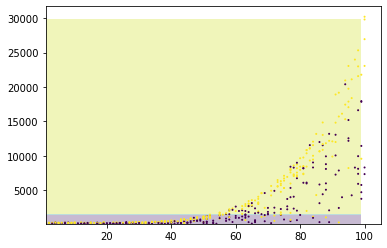

In [23]:
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha = 0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c = teste_y, s = 1)

In [30]:
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                        stratify = y)
print(treino_x.shape)
print(teste_x.shape)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC()
modelo.fit(treino_x, treino_y.values.ravel()) # com treino_y da um aviso, estudar "numpy.ravel" (https://numpy.org/doc/stable/reference/generated/numpy.ravel.html#numpy.ravel)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100 # taxa de acerto
print("A acurácia foi %.2f%%" % acuracia)

(1617, 2)
(540, 2)
Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 66.85%


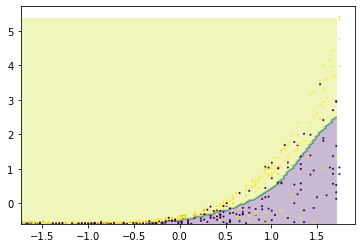

In [32]:
data_x = teste_x[:,0]
data_y = teste_x[:,1]

x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha = 0.3)
plt.scatter(data_x, data_y, c = teste_y, s = 1)